# Data Collection

In [1]:
pip install tensorflow==2.5.3 tensorflow-gpu==2.5.3 opencv-python mediapipe scikit-learn matplotlib

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [6]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [7]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks 
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [8]:
draw_landmarks(frame, results)

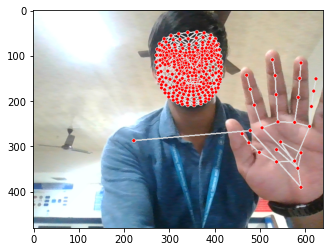

In [9]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [10]:
len(results.left_hand_landmarks.landmark)

21

In [11]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [12]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [13]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)


In [14]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [15]:
result_test = extract_keypoints(results)

In [16]:
result_test

array([ 0.55688983,  0.2711001 , -0.74591672, ...,  0.        ,
        0.        ,  0.        ])

In [17]:
np.save('0', result_test)

In [18]:
np.load('0.npy')

array([ 0.55688983,  0.2711001 , -0.74591672, ...,  0.        ,
        0.        ,  0.        ])

In [19]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['afternoon','good','hello','how are you','i dont understand','i love you','thanks','what','your name'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30

In [20]:
for action in actions: 
    
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [45]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [56]:
cap.release()
cv2.destroyAllWindows()

# Data Preprocession

In [21]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [22]:
label_map = {label:num for num, label in enumerate(actions)}

In [23]:
label_map

{'afternoon': 0,
 'good': 1,
 'hello': 2,
 'how are you': 3,
 'i dont understand': 4,
 'i love you': 5,
 'thanks': 6,
 'what': 7,
 'your name': 8}

In [24]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [25]:
np.array(sequences).shape

(270, 30, 1662)

In [26]:
np.array(labels).shape

(270,)

In [27]:
X = np.array(sequences)

In [28]:
X.shape

(270, 30, 1662)

In [29]:
y = to_categorical(labels).astype(int)

In [30]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [32]:
y_test.shape

(81, 9)

# Model Training

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

In [34]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

# # Model 1

In [40]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [41]:
optimizer = Adam(learning_rate=0.001)  # Adjust the learning rate as needed
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [42]:
#early_stopping = EarlyStopping(patience=100, restore_best_weights=True)

# Learning rate scheduling to adjust learning rate during training
def lr_schedule(epoch):
    if epoch < 200:
        return 0.001
    else:
        return 0.0001

lr_scheduler = LearningRateScheduler(lr_schedule)

In [43]:
res = [.7, 0.2, 0.1]

In [44]:
history = model.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test), callbacks=[lr_scheduler])

Epoch 1/500
6/6 [==============================] - 4s 173ms/step - loss: 2.2626 - categorical_accuracy: 0.1270 - val_loss: 2.2477 - val_categorical_accuracy: 0.0864
Epoch 2/500
6/6 [==============================] - 1s 93ms/step - loss: 2.2042 - categorical_accuracy: 0.1217 - val_loss: 2.1919 - val_categorical_accuracy: 0.0741
Epoch 3/500
6/6 [==============================] - ETA: 0s - loss: 2.1451 - categorical_accuracy: 0.13 - 1s 96ms/step - loss: 2.1451 - categorical_accuracy: 0.1323 - val_loss: 2.3489 - val_categorical_accuracy: 0.0864
Epoch 4/500
6/6 [==============================] - 1s 98ms/step - loss: 2.1010 - categorical_accuracy: 0.1693 - val_loss: 2.1084 - val_categorical_accuracy: 0.1975
Epoch 5/500
6/6 [==============================] - 1s 98ms/step - loss: 1.9502 - categorical_accuracy: 0.2804 - val_loss: 2.7833 - val_categorical_accuracy: 0.0741
Epoch 6/500
6/6 [==============================] - 1s 98ms/step - loss: 2.1351 - categorical_accuracy: 0.2116 - val_loss: 1.9

Epoch 50/500
6/6 [==============================] - 1s 91ms/step - loss: 33.5390 - categorical_accuracy: 0.8307 - val_loss: 3.8599 - val_categorical_accuracy: 0.3457
Epoch 51/500
6/6 [==============================] - 1s 93ms/step - loss: 17.0780 - categorical_accuracy: 0.2275 - val_loss: 8.6641 - val_categorical_accuracy: 0.1111
Epoch 52/500
6/6 [==============================] - 1s 95ms/step - loss: 6.1958 - categorical_accuracy: 0.1587 - val_loss: 3.0457 - val_categorical_accuracy: 0.0864
Epoch 53/500
6/6 [==============================] - 1s 94ms/step - loss: 3.1750 - categorical_accuracy: 0.1376 - val_loss: 2.2388 - val_categorical_accuracy: 0.1358
Epoch 54/500
6/6 [==============================] - 1s 94ms/step - loss: 2.0361 - categorical_accuracy: 0.2169 - val_loss: 2.0599 - val_categorical_accuracy: 0.0741
Epoch 55/500
6/6 [==============================] - 1s 94ms/step - loss: 1.8266 - categorical_accuracy: 0.2063 - val_loss: 1.9918 - val_categorical_accuracy: 0.0617
Epoch 56

6/6 [==============================] - 1s 93ms/step - loss: 0.3978 - categorical_accuracy: 0.7989 - val_loss: 0.7804 - val_categorical_accuracy: 0.6790
Epoch 100/500
6/6 [==============================] - 1s 92ms/step - loss: 0.3615 - categorical_accuracy: 0.8466 - val_loss: 0.6966 - val_categorical_accuracy: 0.7531
Epoch 101/500
6/6 [==============================] - 1s 97ms/step - loss: 0.3546 - categorical_accuracy: 0.8466 - val_loss: 0.7196 - val_categorical_accuracy: 0.7284
Epoch 102/500
6/6 [==============================] - 1s 96ms/step - loss: 0.3475 - categorical_accuracy: 0.8201 - val_loss: 0.7074 - val_categorical_accuracy: 0.8148
Epoch 103/500
6/6 [==============================] - 1s 94ms/step - loss: 0.3436 - categorical_accuracy: 0.8466 - val_loss: 0.7000 - val_categorical_accuracy: 0.7778
Epoch 104/500
6/6 [==============================] - 1s 98ms/step - loss: 0.3007 - categorical_accuracy: 0.8519 - val_loss: 0.7082 - val_categorical_accuracy: 0.7654
Epoch 105/500
6/6 

6/6 [==============================] - 1s 98ms/step - loss: 0.2424 - categorical_accuracy: 0.8519 - val_loss: 0.4567 - val_categorical_accuracy: 0.8889
Epoch 149/500
6/6 [==============================] - 1s 99ms/step - loss: 0.2273 - categorical_accuracy: 0.8730 - val_loss: 0.3856 - val_categorical_accuracy: 0.8642
Epoch 150/500
6/6 [==============================] - 1s 101ms/step - loss: 0.2151 - categorical_accuracy: 0.8783 - val_loss: 0.4092 - val_categorical_accuracy: 0.8148
Epoch 151/500
6/6 [==============================] - 1s 96ms/step - loss: 0.2139 - categorical_accuracy: 0.8677 - val_loss: 0.4010 - val_categorical_accuracy: 0.8395
Epoch 152/500
6/6 [==============================] - 1s 92ms/step - loss: 0.2065 - categorical_accuracy: 0.8889 - val_loss: 0.4083 - val_categorical_accuracy: 0.8765
Epoch 153/500
6/6 [==============================] - 1s 94ms/step - loss: 0.2332 - categorical_accuracy: 0.8624 - val_loss: 0.4242 - val_categorical_accuracy: 0.8519
Epoch 154/500
6/6

6/6 [==============================] - 1s 91ms/step - loss: 0.1662 - categorical_accuracy: 0.9048 - val_loss: 0.6638 - val_categorical_accuracy: 0.7407
Epoch 198/500
6/6 [==============================] - 1s 91ms/step - loss: 0.2588 - categorical_accuracy: 0.8730 - val_loss: 0.4152 - val_categorical_accuracy: 0.9259
Epoch 199/500
6/6 [==============================] - 1s 88ms/step - loss: 0.1752 - categorical_accuracy: 0.9312 - val_loss: 0.6065 - val_categorical_accuracy: 0.8395
Epoch 200/500
6/6 [==============================] - 1s 93ms/step - loss: 0.2362 - categorical_accuracy: 0.9101 - val_loss: 0.4215 - val_categorical_accuracy: 0.9012
Epoch 201/500
6/6 [==============================] - 1s 88ms/step - loss: 0.1396 - categorical_accuracy: 0.9418 - val_loss: 0.3993 - val_categorical_accuracy: 0.9136
Epoch 202/500
6/6 [==============================] - 1s 89ms/step - loss: 0.1382 - categorical_accuracy: 0.9418 - val_loss: 0.4007 - val_categorical_accuracy: 0.9136
Epoch 203/500
6/6 

6/6 [==============================] - 1s 88ms/step - loss: 0.1032 - categorical_accuracy: 0.9577 - val_loss: 0.4445 - val_categorical_accuracy: 0.9259
Epoch 247/500
6/6 [==============================] - 1s 91ms/step - loss: 0.1046 - categorical_accuracy: 0.9524 - val_loss: 0.4527 - val_categorical_accuracy: 0.9259
Epoch 248/500
6/6 [==============================] - 1s 92ms/step - loss: 0.0988 - categorical_accuracy: 0.9577 - val_loss: 0.4526 - val_categorical_accuracy: 0.9136
Epoch 249/500
6/6 [==============================] - 1s 91ms/step - loss: 0.0996 - categorical_accuracy: 0.9577 - val_loss: 0.4517 - val_categorical_accuracy: 0.9136
Epoch 250/500
6/6 [==============================] - 1s 91ms/step - loss: 0.0982 - categorical_accuracy: 0.9577 - val_loss: 0.4551 - val_categorical_accuracy: 0.9136
Epoch 251/500
6/6 [==============================] - 1s 88ms/step - loss: 0.0964 - categorical_accuracy: 0.9630 - val_loss: 0.4540 - val_categorical_accuracy: 0.9259
Epoch 252/500
6/6 

6/6 [==============================] - 1s 97ms/step - loss: 0.0723 - categorical_accuracy: 0.9841 - val_loss: 0.5022 - val_categorical_accuracy: 0.9259
Epoch 296/500
6/6 [==============================] - 1s 97ms/step - loss: 0.0794 - categorical_accuracy: 0.9683 - val_loss: 0.5135 - val_categorical_accuracy: 0.9136
Epoch 297/500
6/6 [==============================] - 1s 97ms/step - loss: 0.0779 - categorical_accuracy: 0.9788 - val_loss: 0.5000 - val_categorical_accuracy: 0.9259
Epoch 298/500
6/6 [==============================] - 1s 94ms/step - loss: 0.0801 - categorical_accuracy: 0.9788 - val_loss: 0.5023 - val_categorical_accuracy: 0.9259
Epoch 299/500
6/6 [==============================] - 1s 93ms/step - loss: 0.0776 - categorical_accuracy: 0.9735 - val_loss: 0.5158 - val_categorical_accuracy: 0.9136
Epoch 300/500
6/6 [==============================] - 1s 94ms/step - loss: 0.0785 - categorical_accuracy: 0.9788 - val_loss: 0.5039 - val_categorical_accuracy: 0.9259
Epoch 301/500
6/6 

6/6 [==============================] - 1s 99ms/step - loss: 0.0572 - categorical_accuracy: 0.9841 - val_loss: 0.5578 - val_categorical_accuracy: 0.9136
Epoch 345/500
6/6 [==============================] - 1s 98ms/step - loss: 0.0653 - categorical_accuracy: 0.9841 - val_loss: 0.5430 - val_categorical_accuracy: 0.9259
Epoch 346/500
6/6 [==============================] - 1s 96ms/step - loss: 0.0522 - categorical_accuracy: 0.9894 - val_loss: 0.5460 - val_categorical_accuracy: 0.9136
Epoch 347/500
6/6 [==============================] - 1s 96ms/step - loss: 0.0513 - categorical_accuracy: 0.9947 - val_loss: 0.5488 - val_categorical_accuracy: 0.9136
Epoch 348/500
6/6 [==============================] - 1s 94ms/step - loss: 0.0503 - categorical_accuracy: 0.9894 - val_loss: 0.5400 - val_categorical_accuracy: 0.9259
Epoch 349/500
6/6 [==============================] - 1s 94ms/step - loss: 0.0513 - categorical_accuracy: 0.9947 - val_loss: 0.5492 - val_categorical_accuracy: 0.9259
Epoch 350/500
6/6 

6/6 [==============================] - 1s 89ms/step - loss: 0.0462 - categorical_accuracy: 0.9894 - val_loss: 0.5833 - val_categorical_accuracy: 0.9136
Epoch 394/500
6/6 [==============================] - 1s 95ms/step - loss: 0.0399 - categorical_accuracy: 0.9894 - val_loss: 0.6066 - val_categorical_accuracy: 0.8889
Epoch 395/500
6/6 [==============================] - ETA: 0s - loss: 0.0377 - categorical_accuracy: 0.98 - 1s 93ms/step - loss: 0.0377 - categorical_accuracy: 0.9894 - val_loss: 0.5814 - val_categorical_accuracy: 0.9136
Epoch 396/500
6/6 [==============================] - 1s 93ms/step - loss: 0.0349 - categorical_accuracy: 0.9947 - val_loss: 0.5929 - val_categorical_accuracy: 0.9136
Epoch 397/500
6/6 [==============================] - 1s 97ms/step - loss: 0.0357 - categorical_accuracy: 0.9947 - val_loss: 0.5956 - val_categorical_accuracy: 0.9136
Epoch 398/500
6/6 [==============================] - 1s 96ms/step - loss: 0.0325 - categorical_accuracy: 0.9947 - val_loss: 0.5903

6/6 [==============================] - 1s 89ms/step - loss: 0.0244 - categorical_accuracy: 0.9947 - val_loss: 0.6242 - val_categorical_accuracy: 0.9012
Epoch 443/500
6/6 [==============================] - 1s 89ms/step - loss: 0.0228 - categorical_accuracy: 0.9947 - val_loss: 0.6339 - val_categorical_accuracy: 0.8889
Epoch 444/500
6/6 [==============================] - 1s 92ms/step - loss: 0.0227 - categorical_accuracy: 0.9947 - val_loss: 0.6244 - val_categorical_accuracy: 0.9012
Epoch 445/500
6/6 [==============================] - 1s 91ms/step - loss: 0.0241 - categorical_accuracy: 0.9947 - val_loss: 0.6282 - val_categorical_accuracy: 0.9012
Epoch 446/500
6/6 [==============================] - 1s 89ms/step - loss: 0.0229 - categorical_accuracy: 0.9947 - val_loss: 0.6369 - val_categorical_accuracy: 0.9012
Epoch 447/500
6/6 [==============================] - 1s 88ms/step - loss: 0.0215 - categorical_accuracy: 0.9947 - val_loss: 0.6248 - val_categorical_accuracy: 0.9012
Epoch 448/500
6/6 

6/6 [==============================] - 1s 98ms/step - loss: 0.0172 - categorical_accuracy: 0.9947 - val_loss: 0.6870 - val_categorical_accuracy: 0.8889
Epoch 492/500
6/6 [==============================] - 1s 94ms/step - loss: 0.0231 - categorical_accuracy: 0.9947 - val_loss: 0.7557 - val_categorical_accuracy: 0.8765
Epoch 493/500
6/6 [==============================] - 1s 92ms/step - loss: 0.0308 - categorical_accuracy: 0.9894 - val_loss: 0.6767 - val_categorical_accuracy: 0.9012
Epoch 494/500
6/6 [==============================] - 1s 100ms/step - loss: 0.0147 - categorical_accuracy: 0.9947 - val_loss: 0.7056 - val_categorical_accuracy: 0.8642
Epoch 495/500
6/6 [==============================] - 1s 93ms/step - loss: 0.0178 - categorical_accuracy: 1.0000 - val_loss: 0.7106 - val_categorical_accuracy: 0.8642
Epoch 496/500
6/6 [==============================] - 1s 95ms/step - loss: 0.0172 - categorical_accuracy: 0.9947 - val_loss: 0.6773 - val_categorical_accuracy: 0.9012
Epoch 497/500
6/6

In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 30, 64)            442112    
_________________________________________________________________
lstm_4 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 9)                 297       
Total params: 596,873
Trainable params: 596,873
Non-trainable params: 0
________________________________________________

In [46]:
res = model.predict(X_test)

In [47]:
actions[np.argmax(res[4])]

'how are you'

In [48]:
actions[np.argmax(y_test[4])]

'how are you'

In [49]:
model.save('action.h5')

In [50]:
model.load_weights('action.h5')

# # Model 2

In [73]:
model2 = Sequential()
model2.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(30,1662)))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(actions.shape[0], activation='softmax'))
optimizer = Adam(learning_rate=0.000003)

model2.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['categorical_accuracy'])

# Train the model
model2.fit(X_train, y_train, epochs=2000, batch_size=32)


Epoch 1/2000
2/2 [==============================] - 0s 19ms/step - loss: 1.2087 - categorical_accuracy: 0.2857
Epoch 2/2000
2/2 [==============================] - 0s 18ms/step - loss: 1.2113 - categorical_accuracy: 0.2698
Epoch 3/2000
2/2 [==============================] - 0s 16ms/step - loss: 1.2062 - categorical_accuracy: 0.3651
Epoch 4/2000
2/2 [==============================] - 0s 18ms/step - loss: 1.1492 - categorical_accuracy: 0.3651
Epoch 5/2000
2/2 [==============================] - 0s 19ms/step - loss: 1.2278 - categorical_accuracy: 0.3175
Epoch 6/2000
2/2 [==============================] - 0s 18ms/step - loss: 1.1738 - categorical_accuracy: 0.3651
Epoch 7/2000
2/2 [==============================] - 0s 19ms/step - loss: 1.1385 - categorical_accuracy: 0.3333
Epoch 8/2000
2/2 [==============================] - 0s 23ms/step - loss: 1.1524 - categorical_accuracy: 0.2857
Epoch 9/2000
2/2 [==============================] - 0s 22ms/step - loss: 1.1125 - categorical_accuracy: 0.3968
E

2/2 [==============================] - 0s 36ms/step - loss: 0.8666 - categorical_accuracy: 0.6667
Epoch 147/2000
2/2 [==============================] - 0s 31ms/step - loss: 0.9212 - categorical_accuracy: 0.5714
Epoch 148/2000
2/2 [==============================] - 0s 25ms/step - loss: 0.9317 - categorical_accuracy: 0.5714
Epoch 149/2000
2/2 [==============================] - 0s 20ms/step - loss: 0.9171 - categorical_accuracy: 0.6190
Epoch 150/2000
2/2 [==============================] - 0s 20ms/step - loss: 0.9090 - categorical_accuracy: 0.6349
Epoch 151/2000
2/2 [==============================] - 0s 22ms/step - loss: 0.8837 - categorical_accuracy: 0.6508
Epoch 152/2000
2/2 [==============================] - 0s 22ms/step - loss: 0.8722 - categorical_accuracy: 0.6349
Epoch 153/2000
2/2 [==============================] - 0s 23ms/step - loss: 0.9185 - categorical_accuracy: 0.5556
Epoch 154/2000
2/2 [==============================] - 0s 23ms/step - loss: 0.8851 - categorical_accuracy: 0.619

2/2 [==============================] - 0s 18ms/step - loss: 0.7172 - categorical_accuracy: 0.7302
Epoch 291/2000
2/2 [==============================] - 0s 22ms/step - loss: 0.7087 - categorical_accuracy: 0.7143
Epoch 292/2000
2/2 [==============================] - 0s 22ms/step - loss: 0.6782 - categorical_accuracy: 0.7460
Epoch 293/2000
2/2 [==============================] - 0s 20ms/step - loss: 0.7463 - categorical_accuracy: 0.6190
Epoch 294/2000
2/2 [==============================] - 0s 20ms/step - loss: 0.7584 - categorical_accuracy: 0.6825
Epoch 295/2000
2/2 [==============================] - 0s 19ms/step - loss: 0.8196 - categorical_accuracy: 0.6032
Epoch 296/2000
2/2 [==============================] - 0s 16ms/step - loss: 0.7541 - categorical_accuracy: 0.6984
Epoch 297/2000
2/2 [==============================] - 0s 17ms/step - loss: 0.7154 - categorical_accuracy: 0.7619
Epoch 298/2000
2/2 [==============================] - 0s 16ms/step - loss: 0.7329 - categorical_accuracy: 0.714

2/2 [==============================] - 0s 32ms/step - loss: 0.5846 - categorical_accuracy: 0.7143
Epoch 435/2000
2/2 [==============================] - 0s 36ms/step - loss: 0.5687 - categorical_accuracy: 0.8254
Epoch 436/2000
2/2 [==============================] - 0s 26ms/step - loss: 0.6128 - categorical_accuracy: 0.7460
Epoch 437/2000
2/2 [==============================] - 0s 22ms/step - loss: 0.5895 - categorical_accuracy: 0.8095
Epoch 438/2000
2/2 [==============================] - 0s 20ms/step - loss: 0.5720 - categorical_accuracy: 0.8095
Epoch 439/2000
2/2 [==============================] - 0s 21ms/step - loss: 0.6456 - categorical_accuracy: 0.7302
Epoch 440/2000
2/2 [==============================] - 0s 31ms/step - loss: 0.6466 - categorical_accuracy: 0.6825
Epoch 441/2000
2/2 [==============================] - 0s 26ms/step - loss: 0.6028 - categorical_accuracy: 0.7460
Epoch 442/2000
2/2 [==============================] - 0s 22ms/step - loss: 0.6434 - categorical_accuracy: 0.698

2/2 [==============================] - 0s 23ms/step - loss: 0.4920 - categorical_accuracy: 0.8413
Epoch 579/2000
2/2 [==============================] - 0s 20ms/step - loss: 0.5219 - categorical_accuracy: 0.8095
Epoch 580/2000
2/2 [==============================] - 0s 18ms/step - loss: 0.5156 - categorical_accuracy: 0.7619
Epoch 581/2000
2/2 [==============================] - 0s 20ms/step - loss: 0.5190 - categorical_accuracy: 0.7302
Epoch 582/2000
2/2 [==============================] - 0s 19ms/step - loss: 0.5352 - categorical_accuracy: 0.7937
Epoch 583/2000
2/2 [==============================] - 0s 19ms/step - loss: 0.4490 - categorical_accuracy: 0.8730
Epoch 584/2000
2/2 [==============================] - 0s 18ms/step - loss: 0.5587 - categorical_accuracy: 0.7778
Epoch 585/2000
2/2 [==============================] - 0s 17ms/step - loss: 0.5143 - categorical_accuracy: 0.7619
Epoch 586/2000
2/2 [==============================] - 0s 18ms/step - loss: 0.5457 - categorical_accuracy: 0.746

2/2 [==============================] - 0s 18ms/step - loss: 0.5154 - categorical_accuracy: 0.7619
Epoch 723/2000
2/2 [==============================] - 0s 20ms/step - loss: 0.4589 - categorical_accuracy: 0.8413
Epoch 724/2000
2/2 [==============================] - 0s 22ms/step - loss: 0.4463 - categorical_accuracy: 0.8730
Epoch 725/2000
2/2 [==============================] - 0s 22ms/step - loss: 0.4933 - categorical_accuracy: 0.7778
Epoch 726/2000
2/2 [==============================] - 0s 22ms/step - loss: 0.4298 - categorical_accuracy: 0.8730
Epoch 727/2000
2/2 [==============================] - 0s 23ms/step - loss: 0.4690 - categorical_accuracy: 0.7937
Epoch 728/2000
2/2 [==============================] - 0s 20ms/step - loss: 0.4687 - categorical_accuracy: 0.7937
Epoch 729/2000
2/2 [==============================] - 0s 22ms/step - loss: 0.5273 - categorical_accuracy: 0.7302
Epoch 730/2000
2/2 [==============================] - 0s 19ms/step - loss: 0.4609 - categorical_accuracy: 0.793

2/2 [==============================] - 0s 16ms/step - loss: 0.4236 - categorical_accuracy: 0.8413
Epoch 867/2000
2/2 [==============================] - 0s 16ms/step - loss: 0.3703 - categorical_accuracy: 0.8730
Epoch 868/2000
2/2 [==============================] - 0s 18ms/step - loss: 0.4621 - categorical_accuracy: 0.8095
Epoch 869/2000
2/2 [==============================] - 0s 18ms/step - loss: 0.4571 - categorical_accuracy: 0.7937
Epoch 870/2000
2/2 [==============================] - 0s 17ms/step - loss: 0.4378 - categorical_accuracy: 0.8095
Epoch 871/2000
2/2 [==============================] - 0s 16ms/step - loss: 0.4677 - categorical_accuracy: 0.7460
Epoch 872/2000
2/2 [==============================] - 0s 17ms/step - loss: 0.4043 - categorical_accuracy: 0.8413
Epoch 873/2000
2/2 [==============================] - 0s 19ms/step - loss: 0.4093 - categorical_accuracy: 0.8254
Epoch 874/2000
2/2 [==============================] - 0s 20ms/step - loss: 0.3822 - categorical_accuracy: 0.904

2/2 [==============================] - 0s 19ms/step - loss: 0.4303 - categorical_accuracy: 0.7778
Epoch 1011/2000
2/2 [==============================] - 0s 22ms/step - loss: 0.3374 - categorical_accuracy: 0.8889
Epoch 1012/2000
2/2 [==============================] - 0s 21ms/step - loss: 0.4226 - categorical_accuracy: 0.7778
Epoch 1013/2000
2/2 [==============================] - 0s 29ms/step - loss: 0.4307 - categorical_accuracy: 0.7778
Epoch 1014/2000
2/2 [==============================] - 0s 20ms/step - loss: 0.3677 - categorical_accuracy: 0.8730
Epoch 1015/2000
2/2 [==============================] - 0s 22ms/step - loss: 0.4060 - categorical_accuracy: 0.8413
Epoch 1016/2000
2/2 [==============================] - 0s 23ms/step - loss: 0.4101 - categorical_accuracy: 0.8730
Epoch 1017/2000
2/2 [==============================] - 0s 20ms/step - loss: 0.4396 - categorical_accuracy: 0.7937
Epoch 1018/2000
2/2 [==============================] - 0s 24ms/step - loss: 0.4190 - categorical_accurac

2/2 [==============================] - 0s 17ms/step - loss: 0.3726 - categorical_accuracy: 0.8095
Epoch 1083/2000
2/2 [==============================] - 0s 16ms/step - loss: 0.3671 - categorical_accuracy: 0.8254
Epoch 1084/2000
2/2 [==============================] - 0s 16ms/step - loss: 0.3975 - categorical_accuracy: 0.7937
Epoch 1085/2000
2/2 [==============================] - 0s 16ms/step - loss: 0.3876 - categorical_accuracy: 0.8095
Epoch 1086/2000
2/2 [==============================] - 0s 16ms/step - loss: 0.3472 - categorical_accuracy: 0.8730
Epoch 1087/2000
2/2 [==============================] - 0s 19ms/step - loss: 0.3475 - categorical_accuracy: 0.9048
Epoch 1088/2000
2/2 [==============================] - 0s 14ms/step - loss: 0.3180 - categorical_accuracy: 0.8889
Epoch 1089/2000
2/2 [==============================] - 0s 16ms/step - loss: 0.3807 - categorical_accuracy: 0.8413
Epoch 1090/2000
2/2 [==============================] - 0s 17ms/step - loss: 0.3352 - categorical_accurac

2/2 [==============================] - 0s 17ms/step - loss: 0.3339 - categorical_accuracy: 0.8889
Epoch 1155/2000
2/2 [==============================] - 0s 21ms/step - loss: 0.3443 - categorical_accuracy: 0.8571
Epoch 1156/2000
2/2 [==============================] - 0s 18ms/step - loss: 0.3728 - categorical_accuracy: 0.8254
Epoch 1157/2000
2/2 [==============================] - 0s 21ms/step - loss: 0.3387 - categorical_accuracy: 0.8730
Epoch 1158/2000
2/2 [==============================] - 0s 18ms/step - loss: 0.3715 - categorical_accuracy: 0.8571
Epoch 1159/2000
2/2 [==============================] - 0s 23ms/step - loss: 0.3847 - categorical_accuracy: 0.8413
Epoch 1160/2000
2/2 [==============================] - 0s 21ms/step - loss: 0.3598 - categorical_accuracy: 0.8571
Epoch 1161/2000
2/2 [==============================] - 0s 16ms/step - loss: 0.3743 - categorical_accuracy: 0.8254
Epoch 1162/2000
2/2 [==============================] - 0s 17ms/step - loss: 0.3764 - categorical_accurac

2/2 [==============================] - 0s 18ms/step - loss: 0.3404 - categorical_accuracy: 0.8730
Epoch 1227/2000
2/2 [==============================] - 0s 18ms/step - loss: 0.3480 - categorical_accuracy: 0.8571
Epoch 1228/2000
2/2 [==============================] - 0s 17ms/step - loss: 0.3541 - categorical_accuracy: 0.8571
Epoch 1229/2000
2/2 [==============================] - 0s 20ms/step - loss: 0.3358 - categorical_accuracy: 0.8889
Epoch 1230/2000
2/2 [==============================] - 0s 17ms/step - loss: 0.3786 - categorical_accuracy: 0.8413
Epoch 1231/2000
2/2 [==============================] - 0s 20ms/step - loss: 0.3296 - categorical_accuracy: 0.8889
Epoch 1232/2000
2/2 [==============================] - 0s 24ms/step - loss: 0.3958 - categorical_accuracy: 0.8254
Epoch 1233/2000
2/2 [==============================] - 0s 22ms/step - loss: 0.3769 - categorical_accuracy: 0.8254
Epoch 1234/2000
2/2 [==============================] - 0s 21ms/step - loss: 0.3943 - categorical_accurac

2/2 [==============================] - 0s 32ms/step - loss: 0.3345 - categorical_accuracy: 0.8413
Epoch 1299/2000
2/2 [==============================] - 0s 28ms/step - loss: 0.3348 - categorical_accuracy: 0.8571
Epoch 1300/2000
2/2 [==============================] - 0s 26ms/step - loss: 0.3556 - categorical_accuracy: 0.8254
Epoch 1301/2000
2/2 [==============================] - 0s 23ms/step - loss: 0.3040 - categorical_accuracy: 0.9048
Epoch 1302/2000
2/2 [==============================] - 0s 21ms/step - loss: 0.3511 - categorical_accuracy: 0.8254
Epoch 1303/2000
2/2 [==============================] - 0s 22ms/step - loss: 0.3192 - categorical_accuracy: 0.9206
Epoch 1304/2000
2/2 [==============================] - 0s 23ms/step - loss: 0.3312 - categorical_accuracy: 0.8571
Epoch 1305/2000
2/2 [==============================] - 0s 22ms/step - loss: 0.3776 - categorical_accuracy: 0.7937
Epoch 1306/2000
2/2 [==============================] - 0s 24ms/step - loss: 0.3559 - categorical_accurac

2/2 [==============================] - 0s 19ms/step - loss: 0.3379 - categorical_accuracy: 0.8889
Epoch 1371/2000
2/2 [==============================] - 0s 18ms/step - loss: 0.3534 - categorical_accuracy: 0.8571
Epoch 1372/2000
2/2 [==============================] - 0s 19ms/step - loss: 0.2991 - categorical_accuracy: 0.9048
Epoch 1373/2000
2/2 [==============================] - 0s 17ms/step - loss: 0.3569 - categorical_accuracy: 0.8571
Epoch 1374/2000
2/2 [==============================] - 0s 29ms/step - loss: 0.3640 - categorical_accuracy: 0.8413
Epoch 1375/2000
2/2 [==============================] - 0s 28ms/step - loss: 0.3208 - categorical_accuracy: 0.8730
Epoch 1376/2000
2/2 [==============================] - 0s 24ms/step - loss: 0.3344 - categorical_accuracy: 0.8730
Epoch 1377/2000
2/2 [==============================] - 0s 28ms/step - loss: 0.3282 - categorical_accuracy: 0.9048
Epoch 1378/2000
2/2 [==============================] - 0s 24ms/step - loss: 0.3676 - categorical_accurac

2/2 [==============================] - 0s 22ms/step - loss: 0.3065 - categorical_accuracy: 0.9365
Epoch 1442/2000
2/2 [==============================] - 0s 26ms/step - loss: 0.2973 - categorical_accuracy: 0.9048
Epoch 1443/2000
2/2 [==============================] - 0s 23ms/step - loss: 0.3473 - categorical_accuracy: 0.8571
Epoch 1444/2000
2/2 [==============================] - 0s 23ms/step - loss: 0.3113 - categorical_accuracy: 0.8730
Epoch 1445/2000
2/2 [==============================] - 0s 22ms/step - loss: 0.3561 - categorical_accuracy: 0.8571
Epoch 1446/2000
2/2 [==============================] - 0s 24ms/step - loss: 0.2695 - categorical_accuracy: 0.9206
Epoch 1447/2000
2/2 [==============================] - 0s 25ms/step - loss: 0.3519 - categorical_accuracy: 0.8254
Epoch 1448/2000
2/2 [==============================] - 0s 26ms/step - loss: 0.3489 - categorical_accuracy: 0.8571
Epoch 1449/2000
2/2 [==============================] - 0s 24ms/step - loss: 0.3105 - categorical_accurac

2/2 [==============================] - 0s 27ms/step - loss: 0.2809 - categorical_accuracy: 0.9365
Epoch 1514/2000
2/2 [==============================] - 0s 20ms/step - loss: 0.3217 - categorical_accuracy: 0.8889
Epoch 1515/2000
2/2 [==============================] - 0s 37ms/step - loss: 0.3040 - categorical_accuracy: 0.9048
Epoch 1516/2000
2/2 [==============================] - 0s 27ms/step - loss: 0.2839 - categorical_accuracy: 0.8889
Epoch 1517/2000
2/2 [==============================] - 0s 27ms/step - loss: 0.2891 - categorical_accuracy: 0.9206
Epoch 1518/2000
2/2 [==============================] - 0s 26ms/step - loss: 0.3159 - categorical_accuracy: 0.8730
Epoch 1519/2000
2/2 [==============================] - 0s 24ms/step - loss: 0.2855 - categorical_accuracy: 0.9206
Epoch 1520/2000
2/2 [==============================] - 0s 19ms/step - loss: 0.2764 - categorical_accuracy: 0.9365
Epoch 1521/2000
2/2 [==============================] - 0s 20ms/step - loss: 0.2928 - categorical_accurac

2/2 [==============================] - 0s 23ms/step - loss: 0.2856 - categorical_accuracy: 0.8889
Epoch 1586/2000
2/2 [==============================] - 0s 20ms/step - loss: 0.3274 - categorical_accuracy: 0.8889
Epoch 1587/2000
2/2 [==============================] - 0s 19ms/step - loss: 0.3404 - categorical_accuracy: 0.8730
Epoch 1588/2000
2/2 [==============================] - 0s 16ms/step - loss: 0.2854 - categorical_accuracy: 0.9206
Epoch 1589/2000
2/2 [==============================] - 0s 16ms/step - loss: 0.2794 - categorical_accuracy: 0.9206
Epoch 1590/2000
2/2 [==============================] - 0s 20ms/step - loss: 0.2706 - categorical_accuracy: 0.9365
Epoch 1591/2000
2/2 [==============================] - 0s 18ms/step - loss: 0.2717 - categorical_accuracy: 0.8889
Epoch 1592/2000
2/2 [==============================] - 0s 20ms/step - loss: 0.2900 - categorical_accuracy: 0.9524
Epoch 1593/2000
2/2 [==============================] - 0s 20ms/step - loss: 0.2984 - categorical_accurac

2/2 [==============================] - 0s 20ms/step - loss: 0.2437 - categorical_accuracy: 0.9365
Epoch 1729/2000
2/2 [==============================] - 0s 22ms/step - loss: 0.2754 - categorical_accuracy: 0.9048
Epoch 1730/2000
2/2 [==============================] - 0s 18ms/step - loss: 0.2824 - categorical_accuracy: 0.9048
Epoch 1731/2000
2/2 [==============================] - 0s 18ms/step - loss: 0.2597 - categorical_accuracy: 0.9206
Epoch 1732/2000
2/2 [==============================] - 0s 17ms/step - loss: 0.2651 - categorical_accuracy: 0.8730
Epoch 1733/2000
2/2 [==============================] - 0s 16ms/step - loss: 0.2628 - categorical_accuracy: 0.9206
Epoch 1734/2000
2/2 [==============================] - 0s 18ms/step - loss: 0.2245 - categorical_accuracy: 0.9524
Epoch 1735/2000
2/2 [==============================] - 0s 19ms/step - loss: 0.2681 - categorical_accuracy: 0.9524
Epoch 1736/2000
2/2 [==============================] - 0s 22ms/step - loss: 0.2580 - categorical_accurac

2/2 [==============================] - 0s 16ms/step - loss: 0.2305 - categorical_accuracy: 0.9683
Epoch 1801/2000
2/2 [==============================] - 0s 16ms/step - loss: 0.2446 - categorical_accuracy: 0.9365
Epoch 1802/2000
2/2 [==============================] - 0s 18ms/step - loss: 0.2459 - categorical_accuracy: 0.9206
Epoch 1803/2000
2/2 [==============================] - 0s 16ms/step - loss: 0.2531 - categorical_accuracy: 0.9365
Epoch 1804/2000
2/2 [==============================] - 0s 18ms/step - loss: 0.2551 - categorical_accuracy: 0.9206
Epoch 1805/2000
2/2 [==============================] - 0s 17ms/step - loss: 0.2357 - categorical_accuracy: 0.9365
Epoch 1806/2000
2/2 [==============================] - 0s 20ms/step - loss: 0.2670 - categorical_accuracy: 0.9206
Epoch 1807/2000
2/2 [==============================] - 0s 17ms/step - loss: 0.2340 - categorical_accuracy: 0.9206
Epoch 1808/2000
2/2 [==============================] - 0s 17ms/step - loss: 0.2539 - categorical_accurac

2/2 [==============================] - 0s 24ms/step - loss: 0.2266 - categorical_accuracy: 0.9365
Epoch 1944/2000
2/2 [==============================] - 0s 22ms/step - loss: 0.2086 - categorical_accuracy: 0.9683
Epoch 1945/2000
2/2 [==============================] - 0s 22ms/step - loss: 0.2430 - categorical_accuracy: 0.9048
Epoch 1946/2000
2/2 [==============================] - 0s 22ms/step - loss: 0.2004 - categorical_accuracy: 0.9524
Epoch 1947/2000
2/2 [==============================] - 0s 20ms/step - loss: 0.2187 - categorical_accuracy: 0.9524
Epoch 1948/2000
2/2 [==============================] - 0s 19ms/step - loss: 0.2126 - categorical_accuracy: 0.9524
Epoch 1949/2000
2/2 [==============================] - 0s 20ms/step - loss: 0.2328 - categorical_accuracy: 0.9365
Epoch 1950/2000
2/2 [==============================] - 0s 19ms/step - loss: 0.2066 - categorical_accuracy: 0.9683
Epoch 1951/2000
2/2 [==============================] - 0s 23ms/step - loss: 0.2200 - categorical_accurac

In [72]:
model2.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_20 (Conv1D)           (None, 28, 64)            319168    
_________________________________________________________________
max_pooling1d_20 (MaxPooling (None, 14, 64)            0         
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 12, 128)           24704     
_________________________________________________________________
max_pooling1d_21 (MaxPooling (None, 6, 128)            0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 768)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 128)               98432     
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)             

In [98]:
res = model2.predict(X_test)

In [105]:
actions[np.argmax(res[4])]

'your name'

In [106]:
actions[np.argmax(y_test[4])]

'your name'

In [107]:
model2.save('action-2.h5')

In [108]:
model2.load_weights('action-2.h5')

# Prediction and Accuracy

In [51]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [52]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 

In [53]:
yhat = model.predict(X_train)

In [54]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [55]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[169,   0],
        [  0,  20]],

       [[167,   0],
        [  0,  22]],

       [[168,   0],
        [  0,  21]],

       [[170,   0],
        [  0,  19]],

       [[167,   0],
        [  0,  22]],

       [[165,   0],
        [  0,  24]],

       [[168,   0],
        [  0,  21]],

       [[173,   0],
        [  0,  16]],

       [[165,   0],
        [  0,  24]]], dtype=int64)

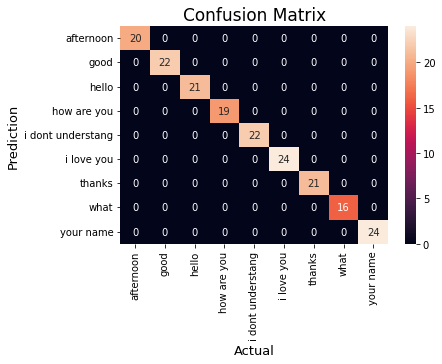

In [56]:
cm = confusion_matrix(ytrue, yhat)
 
#Plot the confusion matrix.
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['afternoon','good','hello','how are you','i dont understang','i love you','thanks','what', 'your name'],
            yticklabels=['afternoon','good','hello','how are you','i dont understang','i love you','thanks','what', 'your name'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [57]:
accuracy_score(ytrue, yhat)

1.0

In [58]:
from scipy import stats

In [59]:
colors = [(245, 117, 16), (117, 245, 16), (16, 117, 245), (245, 16, 117), (117, 16, 245), (16, 245, 117), (245, 245, 16), (16, 245, 245), (245, 16, 245)]

def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [60]:
plt.figure(figsize=(100,100))
plt.imshow(prob_viz(res, actions, image, colors))
plt.show()

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 7200x7200 with 0 Axes>

In [63]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
what


good
<class 'mediapipe.python.solution_base.SolutionOutputs'>
your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>


i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_bas

<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionO

<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionO

<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good
<class 'mediapipe.python.solution_

<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionO

<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>

<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionO

<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionO

<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionO

<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionO

i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_bas

<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionO

<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionO

<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutput

<class 'mediapipe.python.solution_base.SolutionOutputs'>
i dont understand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i dont understand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i dont understand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i dont understand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i dont understand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i dont understand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i dont understand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i dont understand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i dont understand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i dont understand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i dont understand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i dont understand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i dont understand
<class 'mediapipe.python.

<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'

i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_bas

<class 'mediapipe.python.solution_base.SolutionOutputs'>
your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good
<class 'mediapipe.python.solution_base.SolutionOutputs'>
your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
your name


<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i dont understand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_bas

hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
afternoon
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solut

<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'

<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_b

<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i

hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOu

<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i love you
<class 'mediapipe.python.solution_base.SolutionOutput

<class 'mediapipe.python.solution_base.SolutionOutputs'>
good
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good
<class 'mediapipe.python.solution_base.SolutionOutputs'>
your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good
<class 'mediapipe.python.solution_base.SolutionOutputs'>
you

<class 'mediapipe.python.solution_base.SolutionOutputs'>
i dont understand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i dont understand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i dont understand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i dont understand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good
<class 'mediapipe.python.solution_base.SolutionOutputs'>
good
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i dont understand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i dont understand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
afternoon
<class 'mediapipe.python.solution_base.SolutionOutputs'>
afternoon
<class 'mediapipe.python.solution_base.SolutionOutputs'>
afternoon
<class 'mediapipe.python.solution_base.SolutionOutputs'>
afternoon
<class 'mediapipe.python.solution_